# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1</span>

### <font color="teal"> Exercise 01.1
The aim of this exercise is to test the Pseudo-Random Number generator.

**Part 1: estimation of $\langle r \rangle$**

As a first test, we want to estimate $\langle r \rangle$ and its uncertainty, where $r$ is a random number drawn from a uniform distribution in $[0,1)$. 
<br />We want to verify that our estimation converges to the theoretical expected value, which is: $\langle r \rangle = \int_0^1 r dr = 1/2$.

We divide the $M=10^4$ throws into $N=10^2$ blocks and calculate mean values and rispective errors for each block: we obtain $N$ values $m_i$, where $i=1,...,N$ is the block index and $m_{i}$ is the mean value of each block;
then we calculate the cumulative effect progressively summing up the $m_i$ values and evaluating the error as the standard deviation of the mean (blocking method).
<br />$N$ must be such that: $N<M$, $N$ divides exactly $M$ and in each block there is a number of throws sufficient to obtain a good estimation of the mean value of each block.

The graph shows the estimation of  $\langle r \rangle$  and its uncertainty as a function of the number of throws $M$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
from scipy.stats import cauchy

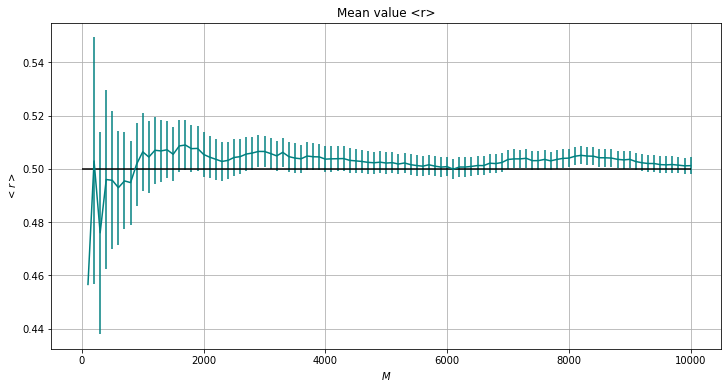

In [2]:
x,y,err=np.loadtxt("1.1/mean.out",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(12, 6))
plt.errorbar(x,y, yerr=err, color='teal')
plt.title("Mean value <r>")
plt.xlabel('$M$')
plt.ylabel('$<r>$')
plt.hlines(0.5, 0, 10000)
plt.grid(True)
plt.show()

The graph confirms the expectations: the mean values converge to $1/2$ and the error bars get smaller as the number of throws $M$ considered (and so the number of blocks $N$) increases.

#### <font color="teal">Part 2:  estimation of $\sigma^2$

We want to estimate $\sigma^2$, the variance of random number drawn from a uniform distribution in $[0,1)$, and its uncertainty, to verify that it converges to the theoretical expected value: $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$.

We use the same method explained above, exept we consider $M=10^5$ throws so that the convergence of the results is more evident.

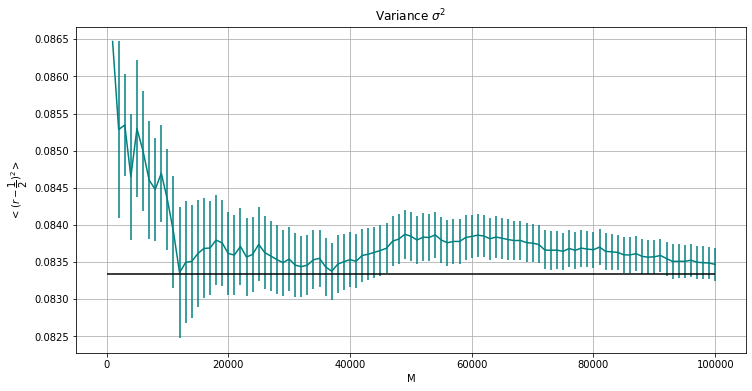

In [3]:
x,y,err=np.loadtxt("1.1/variance.out",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(12, 6))
plt.errorbar(x,y, yerr=err, color='teal')
plt.title("Variance $\sigma^2$")
plt.xlabel('M')
plt.ylabel('$<(r-\dfrac{1}{2})^2>$')
plt.hlines(1/12, 0, 100000)
plt.grid(True)
plt.show()

In the graph one can see that the output confirms our expectations again.

#### <font color="teal">Part 3: $\chi^2$ statistic

To verify the hypothesis that the numbers $r$ are drawn from a uniform distribution, we can estimate the probability that they are not drawn from a uniform distribution: if this probability is low, we can say they are. To do that, we implement the $\chi^2$ test: we divide $[0,1]$ into $M$ identical sub-intervals and draw $n=10^4$ casual numbers; as our hypotesis is that the numbers' distribution is uniform, we expect to obtain $n/M = 100$ numbers in every sub-interval; we compute then $\chi^2$, which is a measure of the error between observations and expected values: 
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
where $n_i$ is the number of observations in the sub-interval with index $i$ and $n/M$ is the expected value in every sub-interval. We repeat the $\chi^2$ statistic for $100$ times.

We expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq M = 100$, the number of sub-intervals.
A larger value of $\chi^2$ indicates that is rather unlikely that the Pseudo-Random Number generator draws numbers from a uniform distribution.

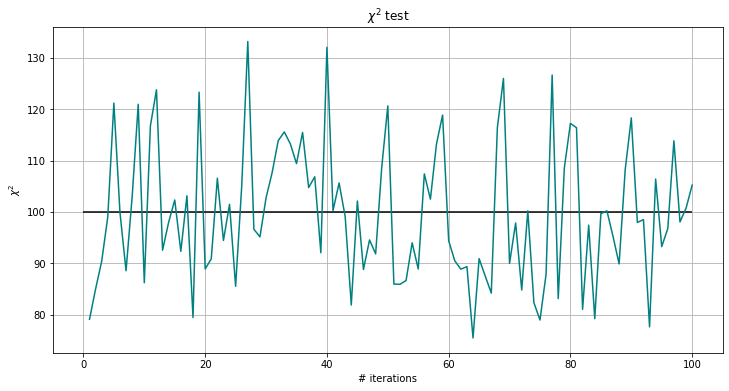

In [4]:
x,y=np.loadtxt("1.1/chi.out",usecols=(0,1),unpack=True)

fig=plt.figure(figsize=(12, 6))
plt.errorbar(x,y, color='teal')
plt.title('$\chi^2$ test')
plt.xlabel('# iterations')
plt.ylabel('$\chi^2$')
plt.hlines(100, 0, 100)
plt.grid(True)
plt.show()

As expected, $\chi^2$ values fluctuate around $100$.

### <font color="teal">Exercise 01.2
#### <font color="Teal"> Central Limit Theorem
The aim of this exercise is to use the Pseudo-Random Number generator to check the Central Limit Theorem.

We want to test it with two new probability distributions:

- exponential distribution: $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$;
- Cauchy-Lorentz distribution: $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$.

We can do that with the <span style="color:teal">method of the inversion of the cumulative distribution</span>: 

$$F(x) = \int_{0}^{x}p(x')dx'=:r \quad \rightarrow \quad x= F^{-1}(r)$$

where $r$ is a random number drawn from a uniform distribution and $p(x)$ is the new distribution we want to extract numbers from. Note that this is true only if $F(x)$ is invertible.

In our cases, we obtain:
- $ x=-\frac{1}{\lambda}\ln(1-r) $;
- $ x=\Gamma \tan [\pi (r-\frac{1}{2})] +\mu $.

We use these distributions to verify the Central Limit Theorem, which states that, given $r_i$ with $i=1,...,N$ indipendent and identically distributed random numbers, each with finite variance $\sigma ^2$ and mean $\mu$, then for large $N$ the probability distribution of the sum $S_N=\sum_{i=1}^N r_i$ (or the mean) tends towards a Gaussian distribution: 
$$ \lim_{N \to \infty} P_N (S_N) =\frac{1}{\sqrt{2 \pi \sigma _{S_N}^{2}}} exp\left(-\frac{(S_N- \mu _{S_N})^{2}}{2 \sigma _{S_N}^{2}}\right)$$

where $\sigma_{S_N}^2=N\sigma^2$ and $\mu_{S_N}=N\mu$

As the Cauchy-Lorentz distribution has undefined variance, we expect that for large $N$ it fits not a Gaussian, but a Caucy-Lorentz distribution.

To verify that, we draw the "dice throws" $r_i$ from the three distributions:
- standard dice (uniform distribution);
- exponential dice (with $\lambda=1$);
- Lorentzian dice (with $\mu=0$ and $\Gamma=1$).

For each dice we make four histagrams for the distribution of $S_N$ ($N=1,2,10,100$, each with $10^4$ realizations of the experiment) to show its tendency towards a Gaussian (or Lorentzian) distribution with increasing $N$. In fact, we expect to be able to fit the case $N=100$ with a Gaussian distribution for standard and exponential dices, and with a Cauchy-Lorentz distribution for the last dice.

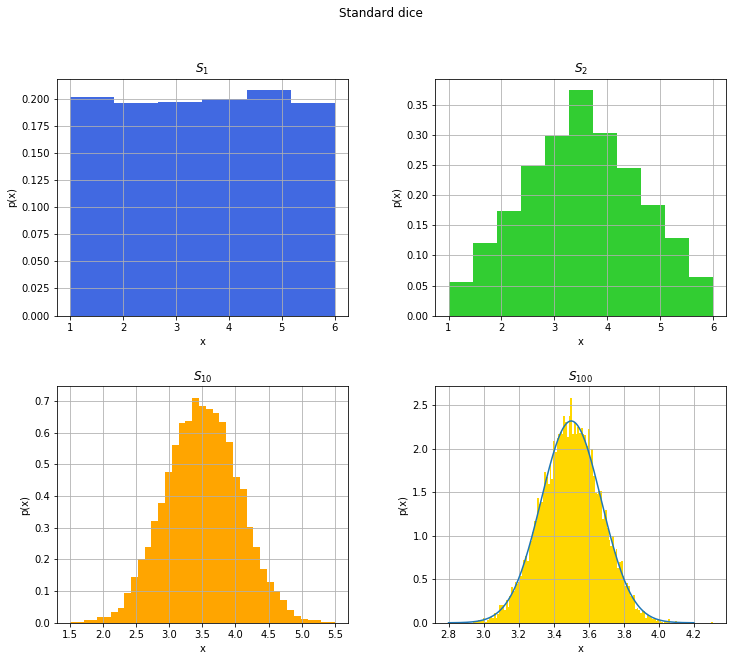

In [5]:
x1=np.loadtxt("1.2/dice_std.out", skiprows=0, max_rows=10000, unpack=True)
x2=np.loadtxt("1.2/dice_std.out", skiprows=10000, max_rows=10000, unpack=True)
x10=np.loadtxt("1.2/dice_std.out", skiprows=20000, max_rows=10000, unpack=True)
x100=np.loadtxt("1.2/dice_std.out", skiprows=30000, max_rows=10000, unpack=True)

fig=plt.figure(figsize=(12, 10))
plt.suptitle('Standard dice')
plt.subplots_adjust(wspace=0.3, hspace=0.3)

#N=1
plt.subplot(221)
plt.hist(x1, 6, color='royalblue', density=True)
plt.title('$S_1$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=2
plt.subplot(222)
plt.hist(x2, 11, color='limegreen', density=True)
plt.title('$S_2$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=10
plt.subplot(223)
plt.hist(x10, 39, color='orange', density=True)
plt.title('$S_{10}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=100
plt.subplot(224)
plt.hist(x100, 149, color='gold', density=True)
plt.title('$S_{100}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#fit
par = norm.fit(x100)
x = np.linspace(2.8,4.2, 149)
y = norm.pdf(x, *par)
plt.plot(x, y)

plt.show()

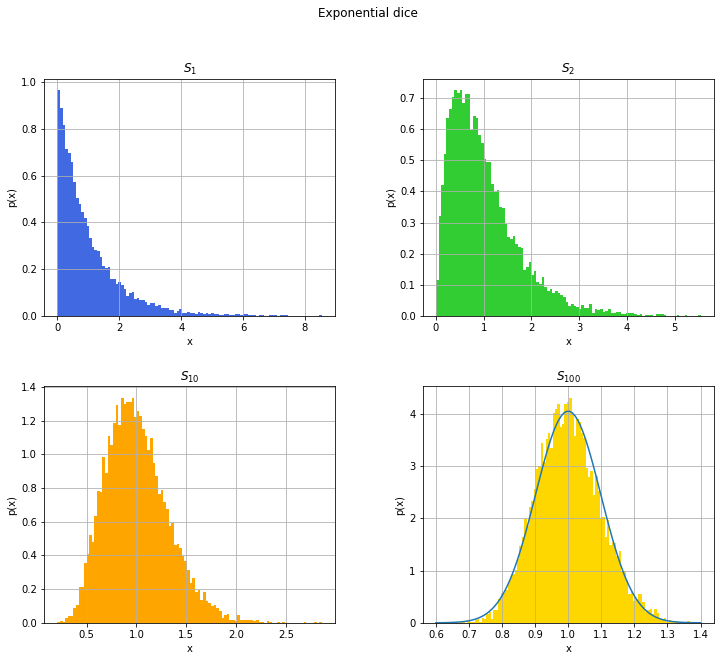

In [6]:
x1=np.loadtxt("1.2/dice_exp.out", skiprows=0, max_rows=10000, unpack=True)
x2=np.loadtxt("1.2/dice_exp.out", skiprows=10000, max_rows=10000, unpack=True)
x10=np.loadtxt("1.2/dice_exp.out", skiprows=20000, max_rows=10000, unpack=True)
x100=np.loadtxt("1.2/dice_exp.out", skiprows=30000, max_rows=10000, unpack=True)

fig=plt.figure(figsize=(12, 10))
plt.suptitle('Exponential dice')
plt.subplots_adjust(wspace=0.3, hspace=0.3)

#N=1
plt.subplot(221)
plt.hist(x1, 100, color='royalblue', density=True)
plt.title('$S_1$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=2
plt.subplot(222)
plt.hist(x2, 100, color='limegreen', density=True)
plt.title('$S_2$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=10
plt.subplot(223)
plt.hist(x10, 100, color='orange', density=True)
plt.title('$S_{10}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=100
plt.subplot(224)
plt.hist(x100, 100, color='gold', density=True)
plt.title('$S_{100}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#fit
par = norm.fit(x100) 
x = np.linspace(0.6, 1.4, 100)
y = norm.pdf(x, *par)
plt.plot(x, y)

plt.show()

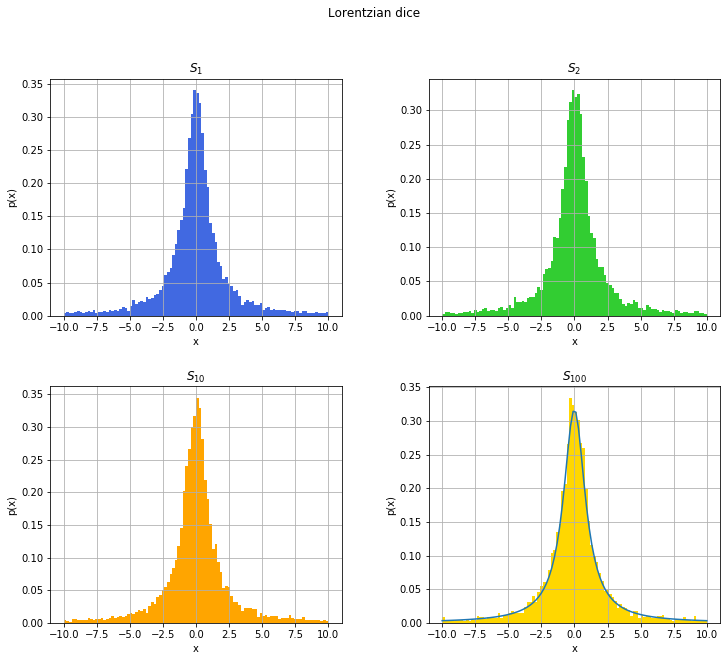

In [7]:
x1=np.loadtxt("1.2/dice_lor.out", skiprows=0, max_rows=10000, unpack=True)
x2=np.loadtxt("1.2/dice_lor.out", skiprows=10000, max_rows=10000, unpack=True)
x10=np.loadtxt("1.2/dice_lor.out", skiprows=20000, max_rows=10000, unpack=True)
x100=np.loadtxt("1.2/dice_lor.out", skiprows=30000, max_rows=10000, unpack=True)

fig=plt.figure(figsize=(12, 10))
plt.suptitle('Lorentzian dice')
plt.subplots_adjust(wspace=0.3, hspace=0.3)

#N=1
plt.subplot(221)
plt.hist(x1, 100, range=(-10,10), color='royalblue', density=True)
plt.title('$S_1$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=2
plt.subplot(222)
plt.hist(x2, 100, range=(-10,10), color='limegreen', density=True)
plt.title('$S_2$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=10
plt.subplot(223)
plt.hist(x10, 100, range=(-10,10), color='orange', density=True)
plt.title('$S_{10}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#N=100
plt.subplot(224)
plt.hist(x100, 100, range=(-10,10), color='gold', density=True)
plt.title('$S_{100}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True) 

#fit
par = cauchy.fit(x100) 
x = np.linspace(-10, 10, 100)
y = cauchy.pdf(x, *par)
plt.plot(x, y)

plt.show()

The output results shown in the histograms confirm the expectations: in every of the three cases, in the first histogram ($N=1$) the probability distribution function $p(x)$ is similar to the input one, while with increasing $N$ to $N=100$, $p(x)$ fits to a Gaussian (or Lorentzian in the last case) distribution.

### <font color="teal">Exercise 01.3
    
#### <font color="Teal"> Buffon's experiment: estimation of $\pi$

A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines at distance $d$ from each other ($d=1$ and $L=0.8$ in this case, so that $d>L$). The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $M$ ($M=10^5$ in this case) times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{M \to \infty}\frac{2LM}{N_{hit}d}$$
    
The method we use to compute $N_{hit}$ is the following:
- we identify the position of the needle by its center $(x_c,y_c)$ on the plane and its orientation $\theta$;
- we considered the plane with the lines sequence orthogonal to the $x$ axis, so that only the $x_c$ value is needed; we randomly draw it in $[0,d)$;
- the needle hits a line when $x_c-\frac{L}{2}cos \theta \leq 0 $ or $x_c+\frac{L}{2}cos \theta \geq d$ (with $cos \theta \geq 0$);
- to compute $cos \theta = \frac{x}{(x^2+y^2)^{1/2}}$ we randomly draw two variables $x$ and $y$ in $[0,1]$ within the unitary circumference (in the first quadrant, where $cos \theta \geq 0$).

This holds for any extension of the horizontal plane, as  we can reduce the problem to a single strip $[0,d)$ assuming periodic boundary conditions.
    
We evaluate the statistical uncertainties with the blocking method as for Exercise 01.1.

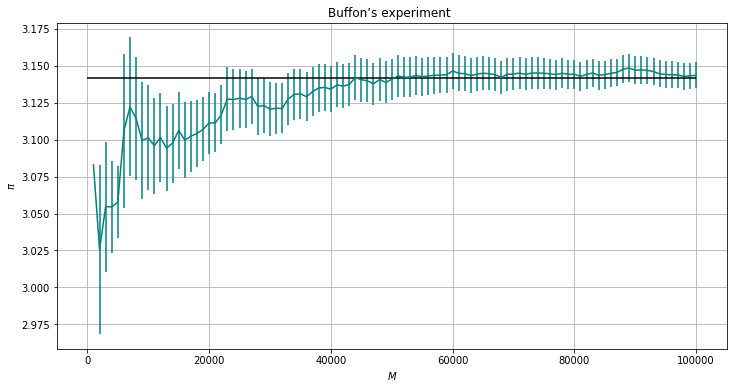

In [8]:
x,pi,err=np.loadtxt("1.3/pi.out",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(12, 6))
plt.errorbar(x,pi,yerr=err,color='teal')
plt.title("Buffon’s experiment ")
plt.xlabel('$M$')
plt.ylabel('$\pi$')
plt.hlines(math.pi, 0, 100000)
plt.grid(True)
plt.show()

As expected, the estimation values converge to $\pi$ and the error bars get smaller while the number of throws $M$ increases.